In [9]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.0/99.8 MB 178.6 kB/s eta 0:09:19
   ---------------------------------------- 0.1/99.8 MB 252.2 kB/s eta 0:06:36
   ---------------------------------------- 0.1/99.8 MB 308.0 kB/s eta 0:05:24
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 355.0 kB/s eta 0:04:41
   -----------------------------

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report


In [51]:
df=pd.read_csv("creditcard.csv")

In [52]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 284807 │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 31     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean       ┃ sd     ┃ p0    ┃ p25     ┃ p50      ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Time          │   0 │     0 │      95000 │  47000 │     0 │   54000 │    85000 │  140000 │ 170000 │ ▂▇▇▂▇▇ │  │
│ │ V1            │   0 │     0 │    1.2e-15 │      2 │   -56 │   -0.92 │    0.018 │     1.3 │    2.5 │      ▇ │  │
│ │ V2            │   0 │     0 │    3.4e-16 │    1.7 │   -73 │    -0.6 │    0.065 │     0.8 │     22 │     ▇  │  │
│ │ V3            │   0 │     0 │   -1.4e-15 │    1.5 │   -48 │   -0.89 │     0.18 │       1 │    9.4 │     ▅▇ │  │
│ │ V4            │   0 │     0 │    2.1e-15 │    1.4 │  -5.7 │   -0.85 │    -0.02 │    0.74 │     17 │  ▁▇▁   │  │
│ │ V5            │   0 │     0 │    9.6e-16 │    1.4 │  -110 │   -0.69 │   -0.054 │    0.61 │     35 │     ▇  │  │
│ │ V6            │   0 │     0 │    1.5e-15 │    1.3 │   -26 │   -0.77 │    -0.27 │     0.4 │     73 │    ▇   │  │
│ │ V7            │   0 │     0 │   -5.6e-16 │    1.2 │   -44 │   -0.55 │     0.04 │    0.57 │    120 │    ▇   │  │
│ │ V8            │   0 │     0 │    1.2e-16 │    1.2 │   -73 │   -0.21 │    0.022 │    0.33 │     20 │     ▇  │  │
│ │ V9            │   0 │     0 │   -2.4e-15 │    1.1 │   -13 │   -0.64 │   -0.051 │     0.6 │     16 │    ▇▁  │  │
│ │ V10           │   0 │     0 │    2.2e-15 │    1.1 │   -25 │   -0.54 │   -0.093 │    0.45 │     24 │    ▃▇  │  │
│ │ V11           │   0 │     0 │    1.7e-15 │      1 │  -4.8 │   -0.76 │   -0.033 │    0.74 │     12 │   ▇▂   │  │
│ │ V12           │   0 │     0 │   -1.2e-15 │      1 │   -19 │   -0.41 │     0.14 │    0.62 │    7.8 │    ▁▇  │  │
│ │ V13           │   0 │     0 │    8.2e-16 │      1 │  -5.8 │   -0.65 │   -0.014 │    0.66 │    7.1 │   ▁▇▃  │  │
│ │ V14           │   0 │     0 │    1.2e-15 │   0.96 │   -19 │   -0.43 │    0.051 │    0.49 │     11 │    ▇▂  │  │
│ │ V15           │   0 │     0 │    4.9e-15 │   0.92 │  -4.5 │   -0.58 │    0.048 │    0.65 │    8.9 │   ▇▇   │  │
│ │ V16           │   0 │     0 │    1.4e-15 │   0.88 │   -14 │   -0.47 │    0.066 │    0.52 │     17 │    ▇   │  │
│ │ V17           │   0 │     0 │   -3.8e-16 │   0.85 │   -25 │   -0.48 │   -0.066 │     0.4 │    9.3 │     ▇  │  │
│ │ V18           │   0 │     0 │    9.6e-16 │   0.84 │  -9.5 │    -0.5 │  -0.0036 │     0.5 │      5 │    ▇▅  │  │
│ │ V19           │   0 │     0 │      1e-15 │   0.81 │  -7.2 │   -0.46 │   0.0037 │    0.46 │    5.6 │    ▁▇  │  │
│ │ V20           │   0 │     0 │    6.4e-16 │   0.77 │   -54 │   -0.21 │   -0.062 │    0.13 │     39 │     ▇  │  │
│ │ V21           │   0 │     0 │    1.7e-16 │   0.73 │   -35 │   -0.23 │   -0.029 │    0.19 │     27 │     ▇  │  │
│ │ V22           │   0 │     0 │   -3.6e-16 │   0.73 │ 

In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [56]:
null= df.isnull().sum()

In [57]:
null

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [58]:
duplicate=df[df.duplicated()]
duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [61]:
df['Class'].value_counts()
#(0: No Fraud || 1: Fraud)

Class
0    283253
1       473
Name: count, dtype: int64

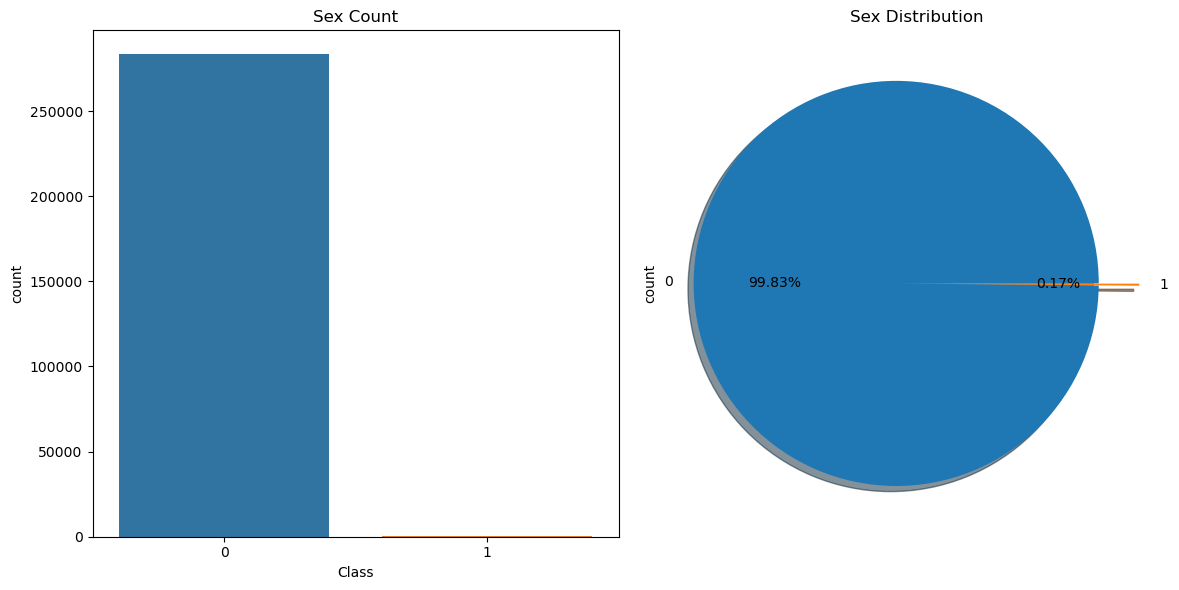

In [62]:
plt.figure(figsize=(12, 6))

# Creating the first subplot - countplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=df, ax=ax1)
ax1.set_title('Sex Count')

# Creating the second subplot - pie chart
ax2 = plt.subplot(1, 2, 2)
df['Class'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=ax2)
ax2.set_title('Sex Distribution')

plt.tight_layout()  # Ensures subplots do not overlap
plt.show()

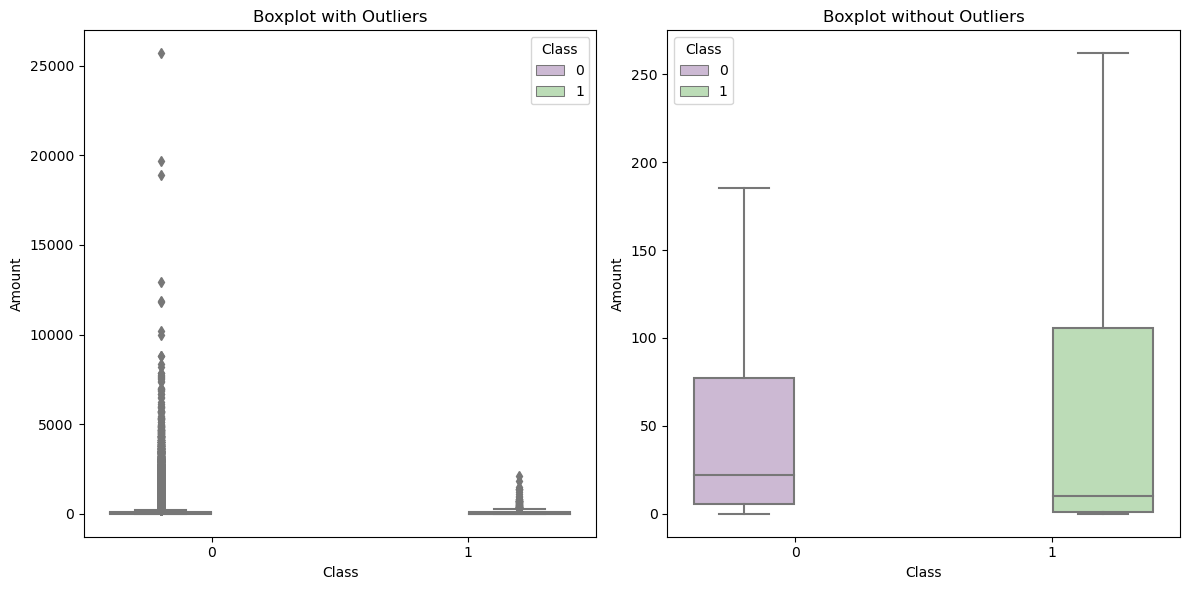

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot with outliers
sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=df, palette="PRGn", showfliers=True)
ax1.set_title('Boxplot with Outliers')

# Boxplot without outliers
sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=df, palette="PRGn", showfliers=False)
ax2.set_title('Boxplot without Outliers')

plt.tight_layout()
plt.show()

In [64]:
# Grouping the data by 'Class' column and describing 'Amount' for each class
class_descriptions = df.groupby('Class')['Amount'].describe()
# Accessing the description for Class 0
class_0_description = class_descriptions.loc[0]
# Accessing the description for Class 1
class_1_description = class_descriptions.loc[1]
print("Description for Class 0:")
print(class_0_description)
print("\nDescription for Class 1:")
print(class_1_description)

Description for Class 0:
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: 0, dtype: float64

Description for Class 1:
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: 1, dtype: float64


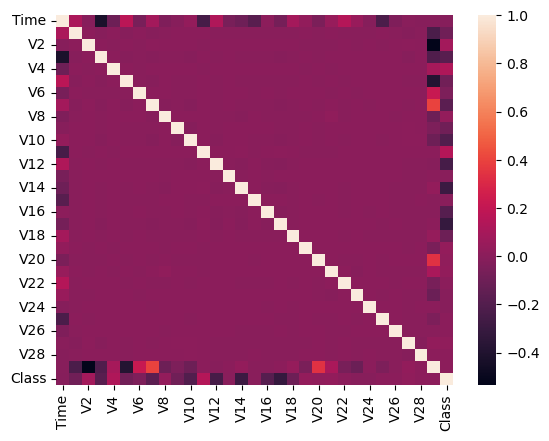

In [65]:
dataplot = sns.heatmap(df.corr()) 
plt.show() 

In [66]:
X= df.drop('Class', axis='columns')
Y= df['Class']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [68]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
print(X.shape, X_train.shape, X_test.shape)

(283726, 30) (226980, 30) (56746, 30)


In [70]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [71]:
Y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9991541254009093


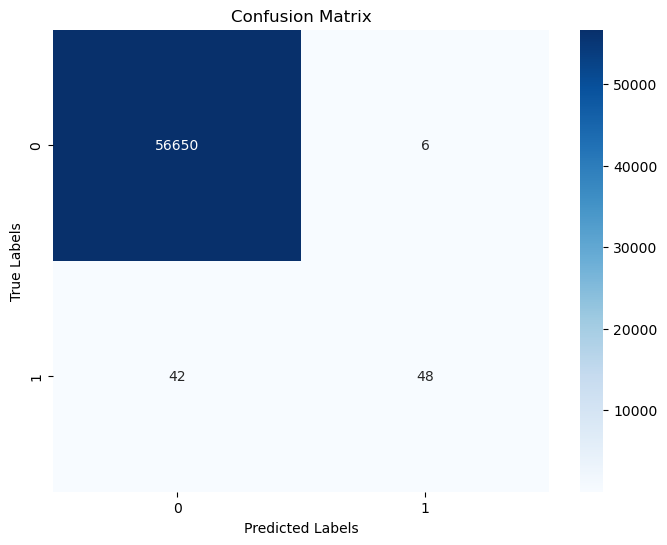

In [72]:
# Predicting labels using the trained model
Y_pred = model.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Displaying the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()